In [2]:
import numpy as np
from skimage.io import imread
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
from utils.visualisation import display_composite, montage

# Load a multi-channel image
A sample image from a follicular lymphoma tumour can be downloaded from: https://www.dropbox.com/s/r19pgcxl171w1sa/FL_multiplex_%5BTMA4%2C5%2CE%5D.tif?dl=0

It contains 8 channels in the following order: 

DAPI, CD68, CD21, CD8, PD1, CD4, FOXP3, autofluorescence.

(7, 2420, 2420)


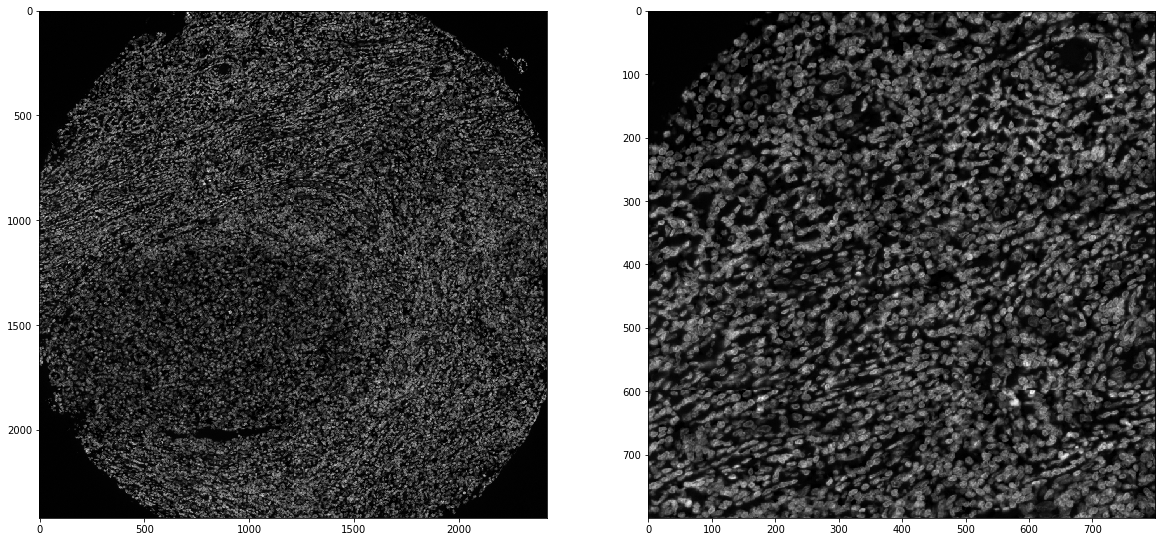

In [3]:
path_image = 'images/FL_multiplex_[TMA4,5,E].tif'
image = imread(path_image)
image = image[:-1,...] # ignore the autofluorescence channel
print(image.shape)

# Display a single channel in grayscale
channel = 0 # dapi is channel 0

ymin,ymax = (210,1010)
xmin,xmax = (210,1010)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,20))
ax1.imshow(image[channel,...], cmap='gray')
ax2.imshow(image[channel,slice(ymin,ymax),slice(xmin,xmax)], cmap='gray') # zoom in
plt.show()

# Composite view

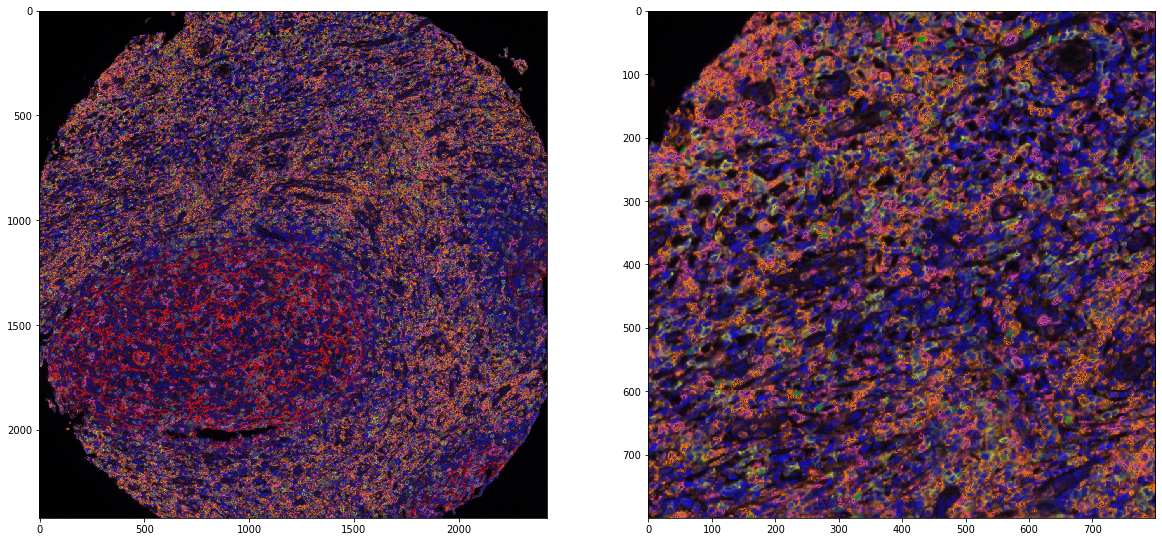

In [3]:
composite = display_composite(image)

# Plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,20))
ax1.imshow(composite) 
ax2.imshow(composite.crop((xmin, ymin, xmax, ymax))) # zoom into an image subset
plt.show()

# Rescale intensities (optional)
Sometimes low level background or bright artifacts are present. One way to remove these is to apply rescaling of the stain intensity so that extreme values are excluded.

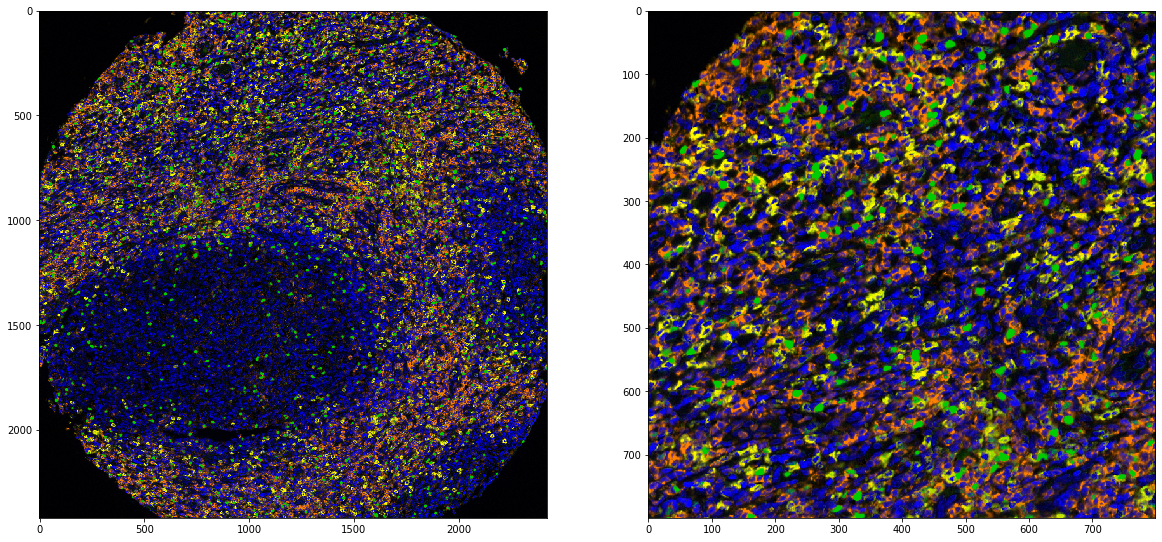

In [4]:
image_scaled = np.zeros(shape=image.shape)
for i,c in enumerate(image):
    image_scaled[i,...] = rescale_intensity(
        c,
        in_range=(np.percentile(c, 1), np.percentile(c, 99)),
        out_range=(0, 255)
    )

# Select channels and colours
image_scaled_selection = image_scaled[[0,3,5,6], ...]

colours = np.array([
            [0, 0, 255],  # blue (usually DAPI)
            [255, 255, 0],  # yellow
            [255, 128, 0],  # orange
            [0, 204, 0]  # green
        ])

composite = display_composite(image_scaled_selection, colours=colours)

# Plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,20))
ax1.imshow(composite) 
ax2.imshow(composite.crop((xmin, ymin, xmax, ymax))) # zoom in
plt.show()

# Display montage of all channels

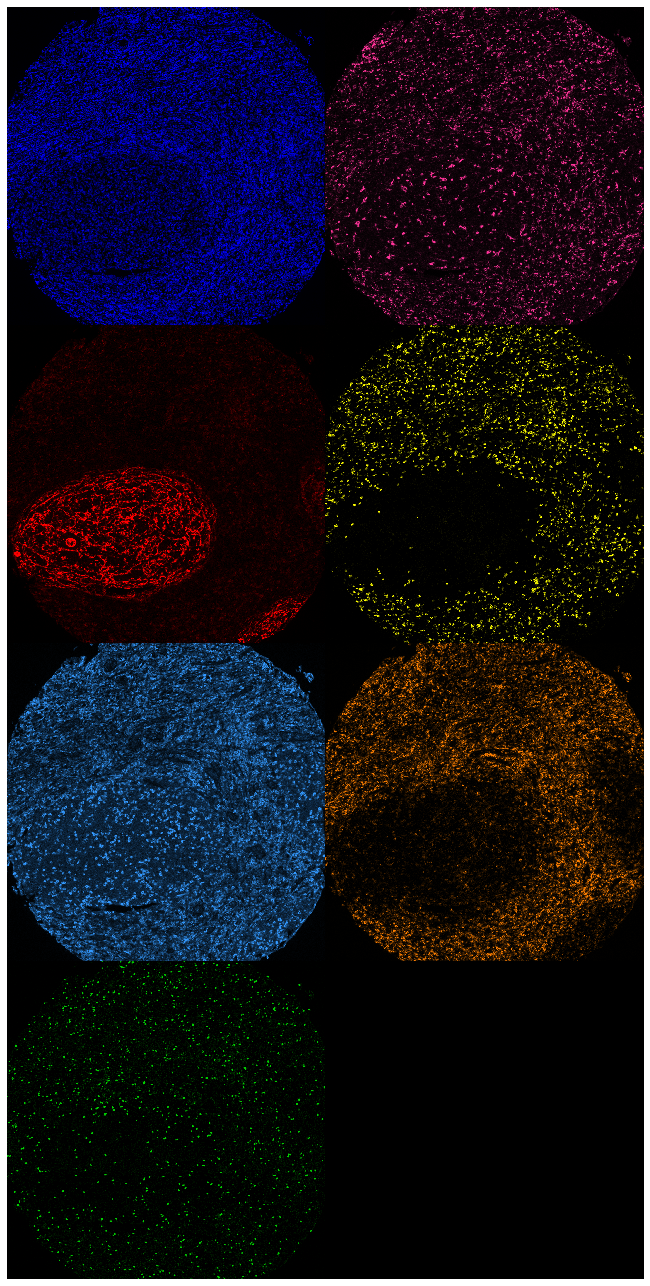

In [5]:
fig = montage(image_scaled)
plt.show()